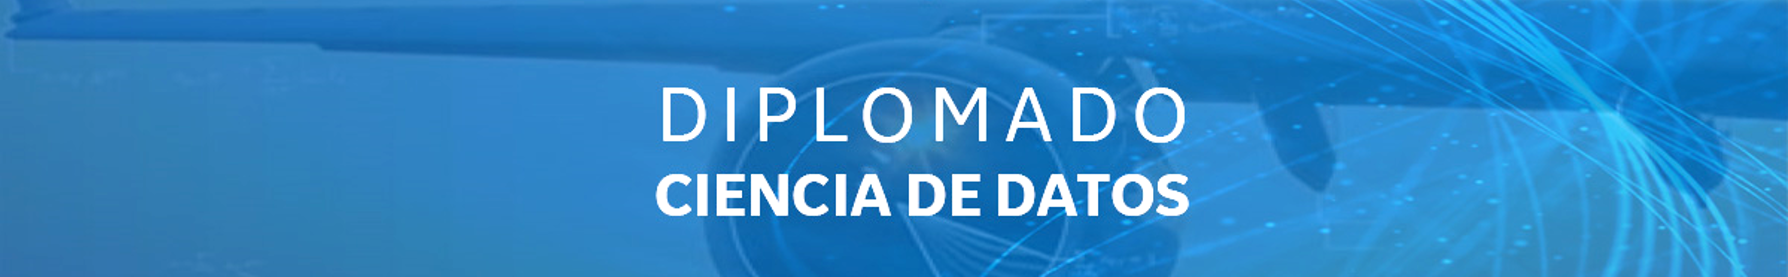

In [2]:
# Cargar Librerias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Tarea: Aplicar tecnicas de agrupamiento al dataset de vinos

In [9]:
df = pd.read_csv('wine-clustering.csv')

print('Renglones: %d, Columnas: %d' % df.shape)

df.head(11).T

Renglones: 178, Columnas: 13


0        1        2        3       4        5   \
Alcohol                 14.23    13.20    13.16    14.37   13.24    14.20   
Malic_Acid               1.71     1.78     2.36     1.95    2.59     1.76   
Ash                      2.43     2.14     2.67     2.50    2.87     2.45   
Ash_Alcanity            15.60    11.20    18.60    16.80   21.00    15.20   
Magnesium              127.00   100.00   101.00   113.00  118.00   112.00   
Total_Phenols            2.80     2.65     2.80     3.85    2.80     3.27   
Flavanoids               3.06     2.76     3.24     3.49    2.69     3.39   
Nonflavanoid_Phenols     0.28     0.26     0.30     0.24    0.39     0.34   
Proanthocyanins          2.29     1.28     2.81     2.18    1.82     1.97   
Color_Intensity          5.64     4.38     5.68     7.80    4.32     6.75   
Hue                      1.04     1.05     1.03     0.86    1.04     1.05   
OD280                    3.92     3.40     3.17     3.45    2.93     2.85   
Proline               1065.00  1050.00  1185.00  1480.00  735.00  1450.00   

                           6        7        8        9        10  
Alcohol                 14.39    14.06    14.83    13.86    14.10  
Malic_Acid               1.87     2.15     1.64     1.35     2.16  
Ash                      2.45     2.61     2.17     2.27     2.30  
Ash_Alcanity            14.60    17.60    14.00    16.00    18.00  
Magnesium               96.00   121.00    97.00    98.00   105.00  
Total_Phenols            2.50     2.60     2.80     2.98     2.95  
Flavanoids               2.52     2.51     2.98     3.15     3.32  
Nonflavanoid_Phenols     0.30     0.31     0.29     0.22     0.22  
Proanthocyanins          1.98     1.25     1.98     1.85     2.38  
Color_Intensity          5.25     5.05     5.20     7.22     5.75  
Hue                      1.02     1.06     1.08     1.01     1.25  
OD280                    3.58     3.58     2.85     3.55     3.17  
Proline               1290.00  1295.00  1045.00  1045.00  1510.00

<AxesSubplot:>

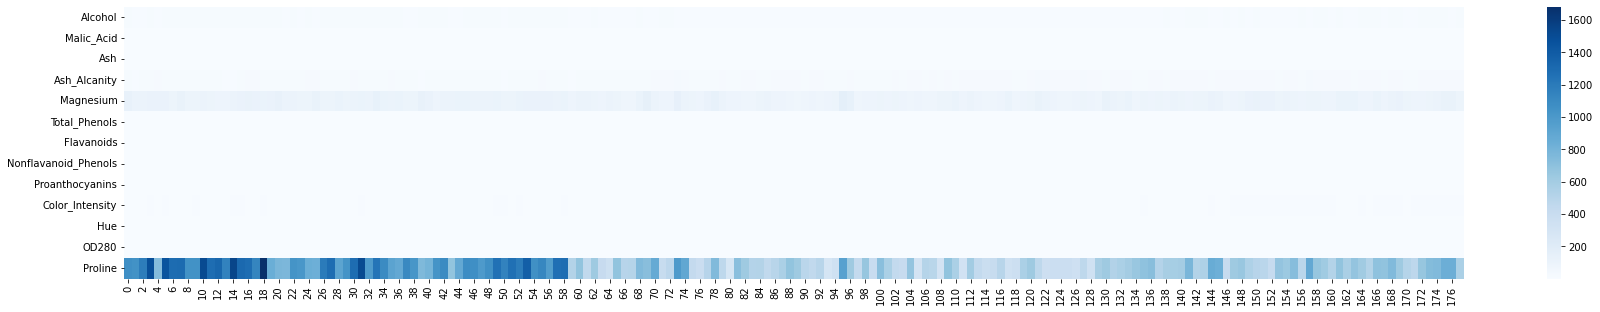

In [42]:
plt.figure(figsize=(30,5))
sns.heatmap(df.T, cmap='Blues')

Apliquemos un escalamiento que lleve todas las columnas a un intervalo entre 0 y 1, para ellos usaremos [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) de sklearn

In [41]:
from sklearn.preprocessing import MinMaxScaler

values_encoded_dict = {}

for column in df.columns.tolist():
    encoder = MinMaxScaler()
    X_encoded = encoder.fit_transform( df[[column]] )
    values_encoded_dict[column] = X_encoded.reshape(-1)

df_encoded = pd.DataFrame( values_encoded_dict )
df_encoded.head(11).T

0         1         2         3         4   \
Alcohol               0.842105  0.571053  0.560526  0.878947  0.581579   
Malic_Acid            0.191700  0.205534  0.320158  0.239130  0.365613   
Ash                   0.572193  0.417112  0.700535  0.609626  0.807487   
Ash_Alcanity          0.257732  0.030928  0.412371  0.319588  0.536082   
Magnesium             0.619565  0.326087  0.336957  0.467391  0.521739   
Total_Phenols         0.627586  0.575862  0.627586  0.989655  0.627586   
Flavanoids            0.573840  0.510549  0.611814  0.664557  0.495781   
Nonflavanoid_Phenols  0.283019  0.245283  0.320755  0.207547  0.490566   
Proanthocyanins       0.593060  0.274448  0.757098  0.558360  0.444795   
Color_Intensity       0.372014  0.264505  0.375427  0.556314  0.259386   
Hue                   0.455285  0.463415  0.447154  0.308943  0.455285   
OD280                 0.970696  0.780220  0.695971  0.798535  0.608059   
Proline               0.561341  0.550642  0.646933  0.857347  0.325963   

                            5         6         7         8         9   \
Alcohol               0.834211  0.884211  0.797368  1.000000  0.744737   
Malic_Acid            0.201581  0.223320  0.278656  0.177866  0.120553   
Ash                   0.582888  0.582888  0.668449  0.433155  0.486631   
Ash_Alcanity          0.237113  0.206186  0.360825  0.175258  0.278351   
Magnesium             0.456522  0.282609  0.554348  0.293478  0.304348   
Total_Phenols         0.789655  0.524138  0.558621  0.627586  0.689655   
Flavanoids            0.643460  0.459916  0.457806  0.556962  0.592827   
Nonflavanoid_Phenols  0.396226  0.320755  0.339623  0.301887  0.169811   
Proanthocyanins       0.492114  0.495268  0.264984  0.495268  0.454259   
Color_Intensity       0.466724  0.338737  0.321672  0.334471  0.506826   
Hue                   0.463415  0.439024  0.471545  0.487805  0.430894   
OD280                 0.578755  0.846154  0.846154  0.578755  0.835165   
Proline               0.835949  0.721826  0.725392  0.547076  0.547076   

                            10  
Alcohol               0.807895  
Malic_Acid            0.280632  
Ash                   0.502674  
Ash_Alcanity          0.381443  
Magnesium             0.380435  
Total_Phenols         0.679310  
Flavanoids            0.628692  
Nonflavanoid_Phenols  0.169811  
Proanthocyanins       0.621451  
Color_Intensity       0.381399  
Hue                   0.626016  
OD280                 0.695971  
Proline               0.878745

<AxesSubplot:>

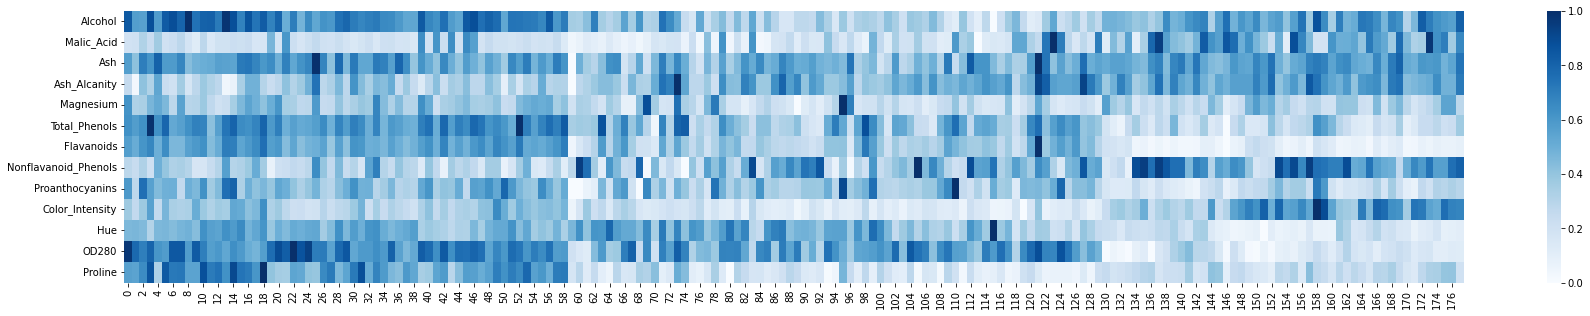

In [43]:
plt.figure(figsize=(30,5))
sns.heatmap(df_encoded.T, cmap='Blues')

**¿Como podemos visualizar un espacio vectorial mulidimendional?**

Para ello recurriremos a tecnicas de proyection, la mas facil de usar es descomponer el espacio multidimencional en dos dimencions, para ello usaremos [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) de sklearn

<AxesSubplot:xlabel='D0', ylabel='D1'>

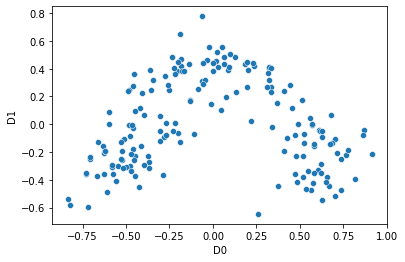

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

df_2d = pd.DataFrame(
    pca.fit_transform( df_encoded ),
    columns=['D0', 'D1']
)

sns.scatterplot(data=df_2d, x='D0', y='D1')

Agrupemos los vinos, con k-means

<AxesSubplot:xlabel='D0', ylabel='D1'>

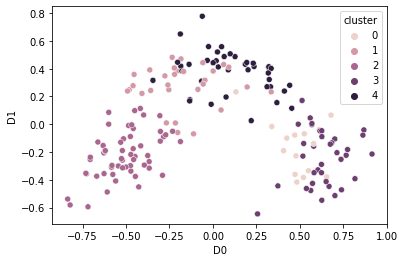

In [49]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5)
model.fit( df_encoded )

df_2d['cluster'] = model.labels_

sns.scatterplot(data=df_2d, x='D0', y='D1', hue='cluster')

Juguemos con la proyeccion y veamos los resultados del clustering en 3D

In [54]:
# Proyeccion a tres dimensiones

pca = PCA(n_components=3)

df_3d = pd.DataFrame(
    pca.fit_transform( df_encoded ),
    columns=['D0', 'D1', 'D2']
)

# Agregando columna de cluster
df_3d['cluster'] = model.labels_


# Graficando
import plotly.express as px

fig = px.scatter_3d(
    df_3d,
    x='D0',
    y='D1',
    z='D2',
    color='cluster',
    color_continuous_scale='rainbow'
)

fig.show()

Apliquemos [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) y veamos el resultado en 3D

<AxesSubplot:ylabel='count'>

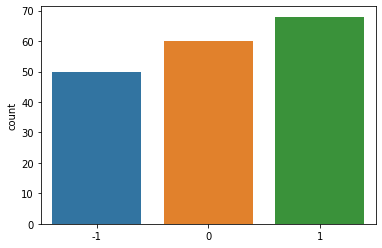

In [90]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.035, min_samples=20, metric='cosine')
model.fit( df_encoded )

sns.countplot( model.labels_ )

In [91]:
df_3d['cluster'] = model.labels_

fig = px.scatter_3d(
    df_3d,
    x='D0',
    y='D1',
    z='D2',
    color='cluster',
    color_continuous_scale='rainbow'
)

fig.show()

Veamos el patron del agrupamiento con los valores escalados

<AxesSubplot:>

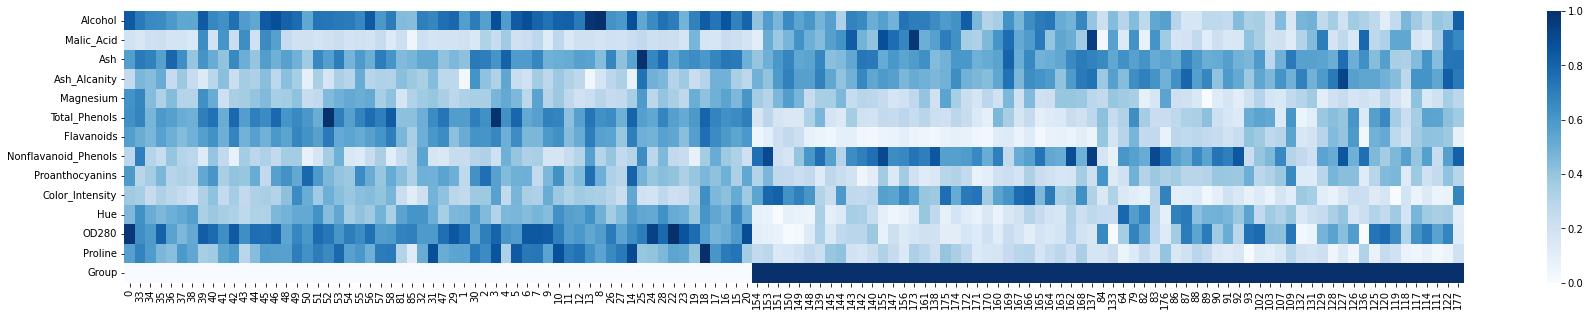

In [92]:
df_encoded['Group'] = model.labels_

df_temp = df_encoded[ df_encoded['Group'] != -1 ]
df_temp['Group'] = df_temp['Group'] / df_temp['Group'].max()
df_temp.sort_values(by='Group', inplace=True)

plt.figure(figsize=(30,5))
sns.heatmap(df_temp.T, cmap='Blues')